In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
pd.options.display.float_format ='{:,.3f}'.format

# Задача 1

- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

### 1.1. Скачать данные (недвижимость)

In [3]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1.2 Изучите стоимости недвижимости

Text(0, 0.5, 'Количество недвижимости')

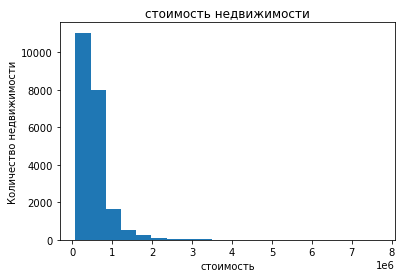

In [22]:
plt.figure(figsize=(6, 4))
plt.hist(df['price'], bins=20)
plt.title('стоимость недвижимости')
plt.xlabel('стоимость')
plt.ylabel('Количество недвижимости')

### 1.3 Изучите распределение квадратуры жилой

In [10]:
data = df['sqft_living'].value_counts()
data

1300    138
1400    135
1440    133
1800    129
1660    129
       ... 
9890      1
5584      1
1961      1
5720      1
1425      1
Name: sqft_living, Length: 1038, dtype: int64

<BarContainer object of 1038 artists>

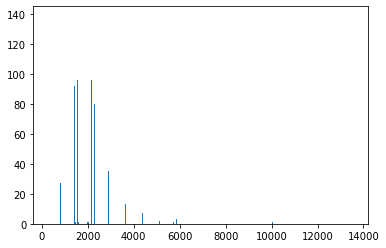

In [12]:
plt.figure(figsize=(6, 4))
plt.bar(data.index, data.values)


### 1.4 Изучите распределение года постройки

In [13]:
data = df['yr_built'].value_counts()
data

2014    559
2006    454
2005    450
2004    433
2003    422
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

<BarContainer object of 116 artists>

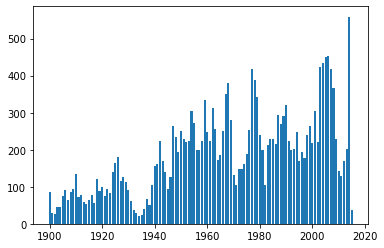

In [14]:
plt.figure(figsize=(6, 4))
plt.bar(data.index, data.values)

# 2 задача

### 2.1 Изучите распределение домов от наличия вида на набережную

- Постройте график
- Сделайте выводы

In [6]:
data = df['waterfront'].value_counts()

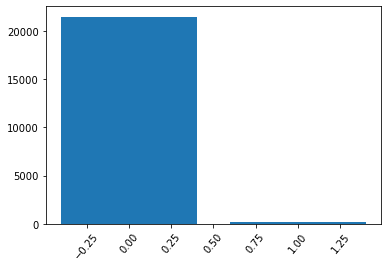

In [7]:
plt.figure(figsize=(6, 4))
plt.bar(data.index, data.values)
plt.xticks(rotation=50);

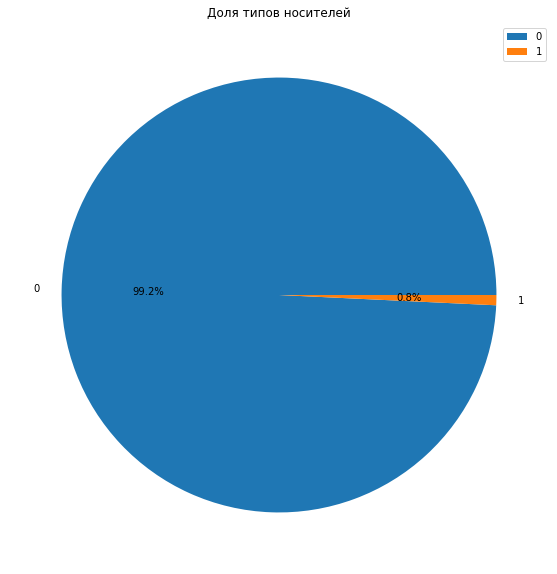

In [9]:
plt.figure(figsize=(10, 10))
expl = [0.2, 0.03, 0.04, 0.05, 0.07, 0.06, 0.05, 0.04, 0.5]
plt.pie(data.values, autopct='%1.1f%%', labels=data.index)
plt.title('Доля типов носителей')
plt.legend(data.index, loc='best');

### 2.2 Изучите распределение этажей домов

In [10]:
data = df['floors'].value_counts()

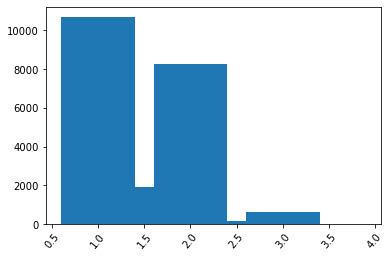

In [11]:
plt.figure(figsize=(6, 4))
plt.bar(data.index, data.values)
plt.xticks(rotation=50);

### 2.3 Изучите распределение состояния домов

In [13]:
data = df['condition'].value_counts()

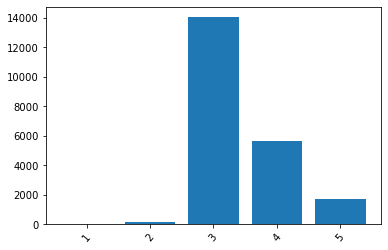

In [14]:
plt.figure(figsize=(6, 4))
plt.bar(data.index, data.values)
plt.xticks(rotation=50);

# 3 задача

Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

Text(0, 0.5, 'Количество недвижимости')

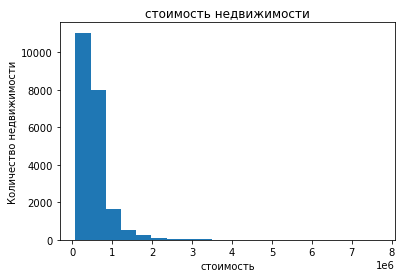

In [21]:
plt.figure(figsize=(6, 4))
plt.hist(df['price'], bins=20)
plt.title('стоимость недвижимости')
plt.xlabel('стоимость')
plt.ylabel('Количество недвижимости')

Получаем, что большинство наших домов стоят где-то до 100к

### Взаимосвязь стоимости недвижимости и категории вида из окна

<AxesSubplot:xlabel='view', ylabel='price'>

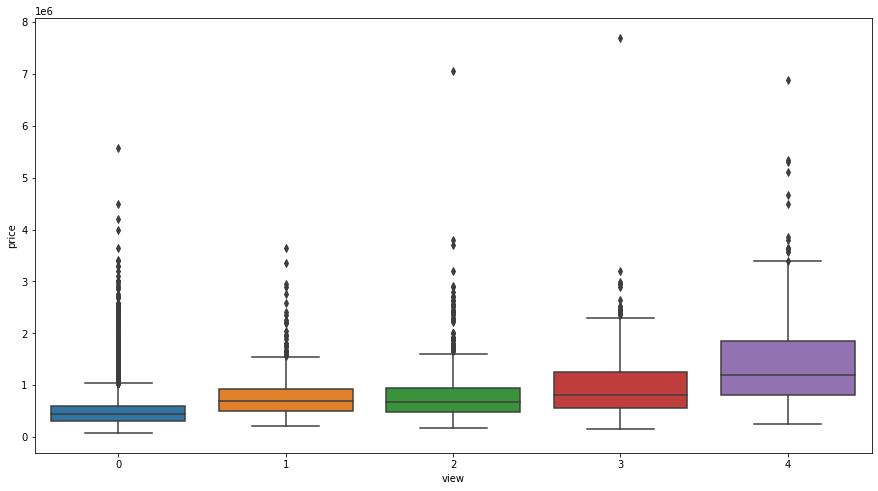

In [5]:
plt.figure(figsize=(15,8))
sns.boxplot(y=df["price"], x=df["view"], whis=1.5)

Средняя стоимость недвижимости 1, 2 и 3 категории практически одинаковая. По 0 и 4 категориям можно сказать что вид из окна влияет на цену.

### Взаимосвязь стоимости недвижимости  и качества конструкции здания и дизайн

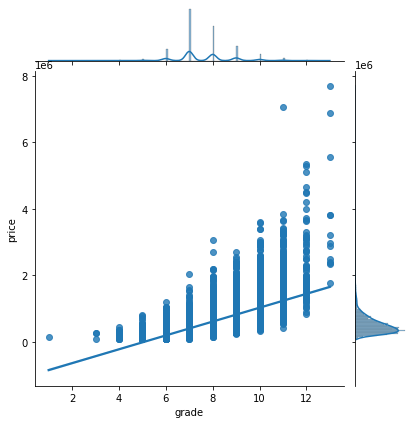

In [15]:

sns.jointplot(y=df["price"], x=df["grade"], kind='reg')

С качеством растет и цена. Домов со средним уровнем больше. Значит предпочтение у покупателей к домам со средним у ровнем и по невысокой цене

### Взаимосвязь стоимости недвижимости и состояния недвижимости

<AxesSubplot:xlabel='condition', ylabel='price'>

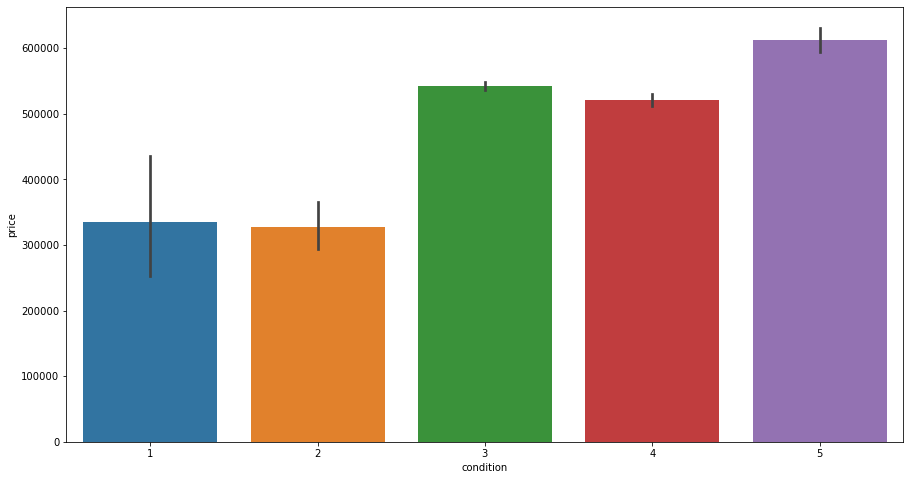

In [19]:
plt.figure(figsize=(15,8))
sns.barplot(y=df["price"], x=df["condition"])

Чем лучше состояние дома, тем выше цена на него